# DIGIT RECOGNIZER USING NEURAL NETWORKS

# 1 Understand the problem and import the more important libraries

In [1]:
import pandas as pd
from tensorflow import keras

**Pandas**

Fast, powerful, flexible and easy to use open source library, built on top of the Python programming language.

**Pandas Dataframe**

It's a two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for "array" objects. Pandas dataframes are based on numpy ndarrays which we should know some about.


In [2]:
#PUT THE CSV DATA INTO A PANDAS DATAFRAME
digits_train = pd.read_csv('C:/Users/torre/OneDrive/Escritorio/PERSONAL/DATA SCIENCE/Kaggle/Digit_Recognizer/train.csv')
digits_train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import numpy as np
import matplotlib.pyplot as pt

In [4]:
digits_train.shape

(42000, 785)

In [5]:
digits_train["label"]

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

# 2 Data Preparation

C:\Users\torre\anaconda3\envs\GonzaloTorres\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5    3795
8    4063
4    4072
0    4132
6    4137
2    4177
9    4188
3    4351
7    4401
1    4684
Name: label, dtype: int64

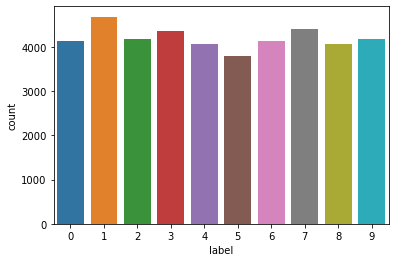

In [6]:
import seaborn as sns

Y_train = digits_train["label"]
X_train = digits_train.drop(labels = "label", axis = 1)

g = sns.countplot(Y_train)

Y_train.value_counts().sort_values(ascending=True)

We can see how is the proportion of the numbers "label" we have in our dataset. When we train the model it would be easier to recognize a 1 than a 5 due to a bigger training subset of data to learn.

# 2.1 Cleaning

In [7]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
test = pd.read_csv('C:/Users/torre/OneDrive/Escritorio/PERSONAL/DATA SCIENCE/Kaggle/Digit_Recognizer/test.csv')

test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

# 2.2 Normalization

Moreover de CNN converge faster on [0,1] data than on [0,255]

In [9]:
#test = test.drop(labels = "label", axis = 1)

#Normalize the data
X_train = X_train / 255
test = test / 255

In [10]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [11]:
#TRAIN DATA
X_train.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#TEST DATA
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2.3 Reshape Data

In [13]:
#Reshape images into 3D matrices
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

Keras requieres an extra parameter at the end to define channels. We use only one due to gray scale image. If we were working with RGB we may use 3.

# 2.4 Label Encoding

One-Hot Encoder

Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.


In [14]:
import keras
import keras.utils
from keras.utils import to_categorical
#Encode labels to one hot vector. Ex -> 2 = (0,0,1,0,0,0,0,0,0,0)
Y_train = to_categorical(Y_train, num_classes = 10)

# 2.5 Split training and validation sets

In [15]:
import sklearn
from sklearn.model_selection import train_test_split

#Set the random seed
random_seed = 2

#Split the train and validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=random_seed)

10% for evaluation, 90% for training

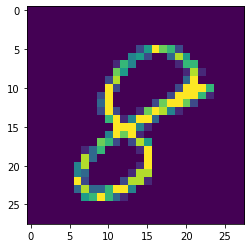

In [16]:
#some examples
g = pt.imshow(X_train[0][:,:,0])

# 3. CNN

# 3.1 Define the model

Epoch 1/10
74/74 [==============================] - 7s 95ms/step - loss: 0.1220 - val_loss: 0.0702
Epoch 2/10
74/74 [==============================] - 7s 93ms/step - loss: 0.0527 - val_loss: 0.0404
Epoch 3/10
74/74 [==============================] - 7s 89ms/step - loss: 0.0338 - val_loss: 0.0315
Epoch 4/10
74/74 [==============================] - 7s 93ms/step - loss: 0.0268 - val_loss: 0.0265
Epoch 5/10
74/74 [==============================] - 7s 90ms/step - loss: 0.0227 - val_loss: 0.0236
Epoch 6/10
74/74 [==============================] - 7s 92ms/step - loss: 0.0195 - val_loss: 0.0210
Epoch 7/10
74/74 [==============================] - 7s 94ms/step - loss: 0.0170 - val_loss: 0.0194
Epoch 8/10
74/74 [==============================] - 7s 93ms/step - loss: 0.0151 - val_loss: 0.0180
Epoch 9/10
74/74 [==============================] - 7s 95ms/step - loss: 0.0136 - val_loss: 0.0167
Epoch 10/10
74/74 [==============================] - 7s 93ms/step - loss: 0.0121 - val_loss: 0.0158


<AxesSubplot:title={'center':'MAE'}>

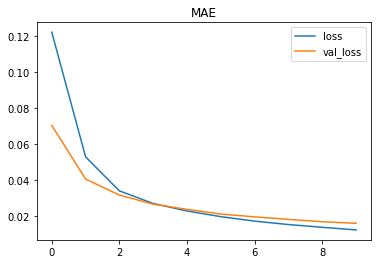

In [27]:
#1. Neural Network with 2 hidden layers of 1024 units

# - The input shape is a Flatten layer of 28x28 input shape (784)

# - We introduce here the mean absolute error or MAE. For each prediction y_pred, MAE measures the disparity from 
#   the true target y_true by an absolute difference abs(y_true - y_pred)

# - We should make a neural network with 10 binary outputs (True, False) depending on what number is it

#INMPORTANT INFO: The loss function measures the disparity between the the target's true value and the value the model predicts


model1 = keras.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(units=1024, activation='relu'),
    layers.Dense(units=1024, activation='relu'),
    layers.Dense(units=10),
])

model1.compile(
    optimizer='adam',
    loss='mae'
)

history1 = model1.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=512,
    epochs=10
)

history_df = pd.DataFrame(history1.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="MAE")

It's not too bad but we should prevent overfitting because the deviation between the loss function and the validation loss is growing while we are still training our net.

We will add Dropout to prevent this in our model.



Epoch 1/10
74/74 [==============================] - 9s 125ms/step - loss: 0.1407 - val_loss: 0.0903
Epoch 2/10
74/74 [==============================] - 9s 126ms/step - loss: 0.0907 - val_loss: 0.0837
Epoch 3/10
74/74 [==============================] - 9s 122ms/step - loss: 0.0857 - val_loss: 0.0829
Epoch 4/10
74/74 [==============================] - 9s 125ms/step - loss: 0.0833 - val_loss: 0.0808
Epoch 5/10
74/74 [==============================] - 9s 123ms/step - loss: 0.0815 - val_loss: 0.0808
Epoch 6/10
74/74 [==============================] - 9s 122ms/step - loss: 0.0807 - val_loss: 0.0790
Epoch 7/10
74/74 [==============================] - 9s 126ms/step - loss: 0.0800 - val_loss: 0.0811
Epoch 8/10
74/74 [==============================] - 9s 125ms/step - loss: 0.0795 - val_loss: 0.0807
Epoch 9/10
74/74 [==============================] - 9s 124ms/step - loss: 0.0789 - val_loss: 0.0798
Epoch 10/10
74/74 [==============================] - 9s 124ms/step - loss: 0.0785 - val_loss: 0.0804

<AxesSubplot:title={'center':'MAE'}>

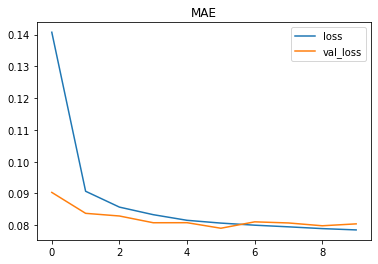

In [28]:
#2. Neural Network with 2 hidden layers of 1024 units and Dropout


model2 = keras.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dropout(0.3),
    layers.Dense(units=1024, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=1024, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=10),
])

model2.compile(
    optimizer='adam',
    loss='mae'
)

history2 = model2.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=512,
    epochs=10
)

history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="MAE")

Epoch 1/10
74/74 [==============================] - 13s 169ms/step - loss: 0.5238 - val_loss: 0.1282
Epoch 2/10
74/74 [==============================] - 12s 169ms/step - loss: 0.2385 - val_loss: 0.1189
Epoch 3/10
74/74 [==============================] - 12s 164ms/step - loss: 0.1727 - val_loss: 0.1110
Epoch 4/10
74/74 [==============================] - 12s 165ms/step - loss: 0.1435 - val_loss: 0.0920
Epoch 5/10
74/74 [==============================] - 13s 171ms/step - loss: 0.1286 - val_loss: 0.0785
Epoch 6/10
74/74 [==============================] - 13s 171ms/step - loss: 0.1186 - val_loss: 0.0743
Epoch 7/10
74/74 [==============================] - 13s 171ms/step - loss: 0.1093 - val_loss: 0.0764
Epoch 8/10
74/74 [==============================] - 12s 164ms/step - loss: 0.1023 - val_loss: 0.0705
Epoch 9/10
74/74 [==============================] - 12s 167ms/step - loss: 0.1005 - val_loss: 0.0739
Epoch 10/10
74/74 [==============================] - 12s 164ms/step - loss: 0.0935 - val_lo

<AxesSubplot:title={'center':'MAE'}>

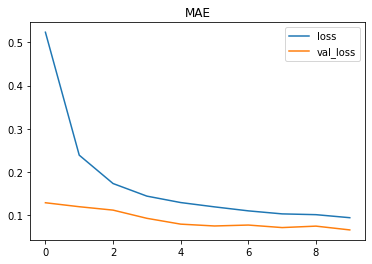

In [29]:
# 3. Introducing the BatchNormalization

model3 = keras.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=10),
])

model3.compile(
    optimizer='adam',
    loss='mae'
)

history3 = model3.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=512,
    epochs=10
)

history_df = pd.DataFrame(history3.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="MAE")

In my opininon the best model is the 3rd, so lets use it to do a prediction

In [32]:
# make a prediction
#test = to_categorical(test, num_classes = 10)
y = model3.predict(test)
y.shape

(28000, 10)

In [33]:
print(y.max())

19.294706


In [34]:
from sklearn import preprocessing
import pandas as pd

scaler = preprocessing.MinMaxScaler()
print(scaler.fit(y))

print(scaler.data_max_)

print(scaler.transform(y))

MinMaxScaler()
[ 2.1963542 19.294706   1.7100171  1.7107791  4.3239965  1.9770316
  1.6247045  1.3067998 10.74236    8.794568 ]
[[0.7150282  0.01187965 0.93909836 ... 0.84546447 0.01864806 0.06116633]
 [0.81228304 0.01158136 0.845675   ... 0.843965   0.01641085 0.05951501]
 [0.7154713  0.01229563 0.84670377 ... 0.8439422  0.01739084 0.06116152]
 ...
 [0.71512556 0.01210198 0.8464765  ... 0.84439266 0.01672754 0.06004684]
 [0.71547925 0.0122914  0.8467051  ... 0.843946   0.01739599 0.06115895]
 [0.71511364 0.01197208 0.921311   ... 0.84518063 0.01839442 0.06114082]]


In [35]:
y = scaler.transform(y)
print(y)

[[0.7150282  0.01187965 0.93909836 ... 0.84546447 0.01864806 0.06116633]
 [0.81228304 0.01158136 0.845675   ... 0.843965   0.01641085 0.05951501]
 [0.7154713  0.01229563 0.84670377 ... 0.8439422  0.01739084 0.06116152]
 ...
 [0.71512556 0.01210198 0.8464765  ... 0.84439266 0.01672754 0.06004684]
 [0.71547925 0.0122914  0.8467051  ... 0.843946   0.01739599 0.06115895]
 [0.71511364 0.01197208 0.921311   ... 0.84518063 0.01839442 0.06114082]]


1


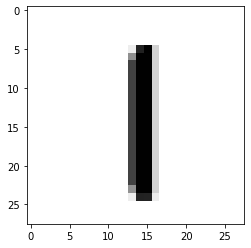

In [37]:
image_index = 2853
pt.imshow(test[image_index].reshape(28, 28),cmap='Greys')
predict = test[image_index].reshape(28,28)
pred = model3.predict(test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [51]:
y_pred = model3.predict(test)
y_pred = np.argmax(y_pred,axis=1)

#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
sub_file = pd.read_csv('C:/Users/torre/OneDrive/Escritorio/PERSONAL/DATA SCIENCE/Kaggle/Digit_Recognizer/sample_submission.csv')
predictions = model3.predict(test)
submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label':y_pred})

submission.to_csv('C:/Users/torre/OneDrive/Escritorio/PERSONAL/DATA SCIENCE/Kaggle/Digit_Recognizer/submission_file.csv', index=False)
digits_train["label"].to_csv('C:/Users/torre/OneDrive/Escritorio/PERSONAL/DATA SCIENCE/Kaggle/Digit_Recognizer/soluciones_file.csv', index=False)

2


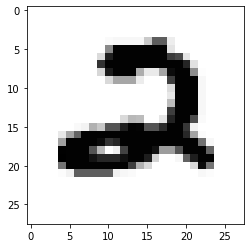

In [24]:
image_index = 0
pt.imshow(test[image_index].reshape(28, 28),cmap='Greys')
predict = test[image_index].reshape(28,28)
pred = model.predict(test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())